## Keras -- MLPs on MNIST

# 1. Importing packages

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


# 2. Function for plotting Train and Test Error

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 3.Splitting data into train and test

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist1 = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

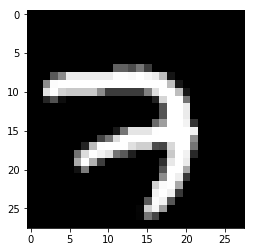

In [10]:
%matplotlib inline
first_image = mnist1.train.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# 4. Normalizing data

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [12]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 30

In [16]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [17]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 107us/step - loss: 1.2656 - acc: 0.7131 - val_loss: 0.8056 - val_acc: 0.8403
Epoch 2/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.7086 - acc: 0.8460 - val_loss: 0.6039 - val_acc: 0.8658
Epoch 3/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.5824 - acc: 0.8627 - val_loss: 0.5233 - val_acc: 0.8750
Epoch 4/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.5222 - acc: 0.8709 - val_loss: 0.4781 - val_acc: 0.8810
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.4853 - acc: 0.8760 - val_loss: 0.4487 - val_acc: 0.8856
Epoch 6/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.4600 - acc: 0.8803 - val_loss: 0.4279 - val_acc: 0.8883
Epoch 7/30
60000/60000 [======

Test score: 0.3165304104745388
Test accuracy: 0.9132


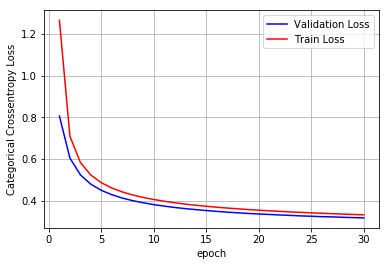

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [19]:
score1 = model.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])

Train score: 0.33035434688329696
Train accuracy: 0.90835


<h2> MLP + ReLU + ADAM </h2>

# 5. Two Hidden layers (input = 784,number of neurons in layer 1 = 512,number of neurons in layer 2 = 128,output = 10

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 40 and Batch_size is 128.
4. We used our metric as 'accuracy'.

In [20]:
import keras
epochs1 = 40
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs1, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 39us/step - loss: 0.2316 - acc: 0.9317 - val_loss: 0.1059 - val_acc: 0.9690
Epoch 2/40
60000/60000 [==============================] - 2s 33us/step - loss: 0.0862 - acc: 0.9740 - val_loss: 0.0794 - val_acc: 0.9762
Epoch 3/40
60000/60000 [=========================

Train score: 0.0011970603236469894
Train accuracy: 0.9997
#############################################
Test score: 0.09155446254908205
Test accuracy: 0.9857


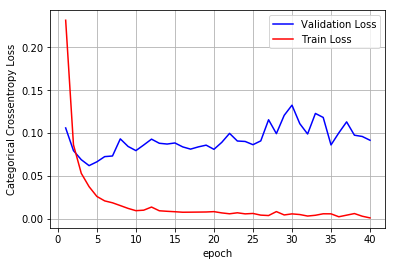

In [21]:
score1 = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs1+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

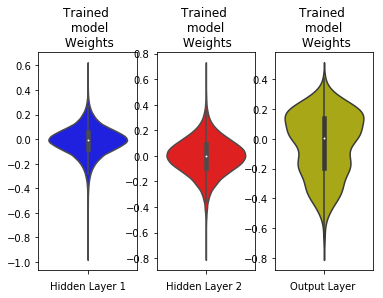

In [23]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained \n model\n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

# 6. Two Hidden layers (input = 784,number of neurons in layer 1 = 512,number of neurons in layer 2 = 128,output = 10) with batch normalization and dropouts

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 20 and Batch_size is 128.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer1 and Layer2.
6. Dropout  rate is 0.5

In [24]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_____

In [25]:
epoch2 = 20
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch2, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.4317 - acc: 0.8690 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2082 - acc: 0.9378 - val_loss: 0.1039 - val_acc: 0.9673
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1610 - acc: 0.9519 - val_loss: 0.0888 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1389 - acc: 0.9579 - val_loss: 0.0779 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1226 - acc: 0.9623 - val_loss: 0.0718 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1105 - acc: 0.9658 - val_loss: 0.0699 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0981 - acc: 0.9695 - val_loss: 0.0658 - val_acc

Train score: 0.011504149301705183
Train accuracy: 0.9963
#############################################
Test score: 0.056958603417154516
Test accuracy: 0.9827


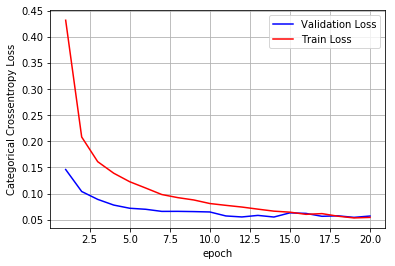

In [26]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch2+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

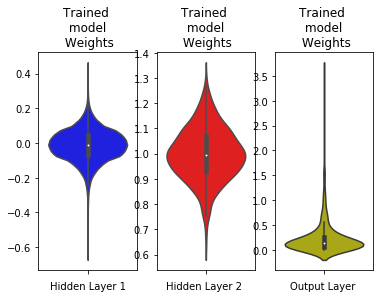

In [27]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 7. Three Hidden layers (input = 784,number of neurons in layer 1 = 400,number of neurons in layer 2 = 300,number of neurons in layer 3 = 200,output = 10)

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 20 and Batch_size is 128.
4. We used our metric as 'accuracy'.

In [28]:
epochs3 = 20
model_relu = Sequential()
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(Dense(300, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs3, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_9 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 496,510
Trainable params: 496,510
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2204 - acc: 0.9349 - val_loss: 0.1051 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================

Train score: 0.006188314759214101
Train accuracy: 0.9981166666666667
#############################################
Test score: 0.09144958206801962
Test accuracy: 0.9818


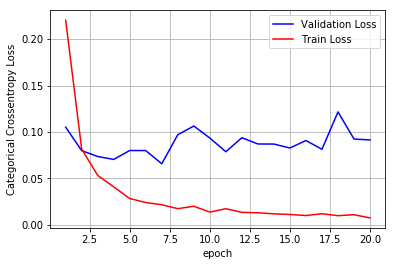

In [29]:
score1 = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs3+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

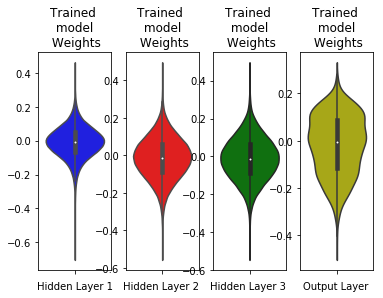

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 8. Three Hidden layers (input = 784,number of neurons in layer 1 = 400,number of neurons in layer 2 = 300,number of neurons in layer 3 = 200,output = 10) with batch normalization and dropout

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 20 and Batch_size is 128.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer2 and Layer3.
6. Dropout  rate is 0.5

In [31]:
model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)              

In [32]:
epoch4 = 20
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch4, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4179 - acc: 0.8753 - val_loss: 0.1395 - val_acc: 0.9564
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1670 - acc: 0.9496 - val_loss: 0.0982 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1169 - acc: 0.9642 - val_loss: 0.0973 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0901 - acc: 0.9726 - val_loss: 0.0831 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0726 - acc: 0.9777 - val_loss: 0.0735 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0618 - acc: 0.9813 - val_loss: 0.0882 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0670 - val_acc

Train score: 0.00532354728956622
Train accuracy: 0.9979833333333333
#############################################
Test score: 0.08492160267545477
Test accuracy: 0.9805


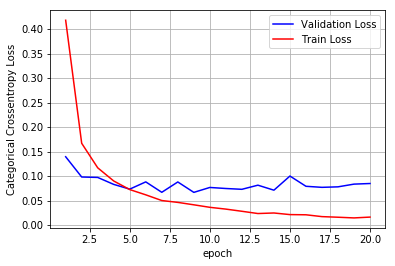

In [33]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch4+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

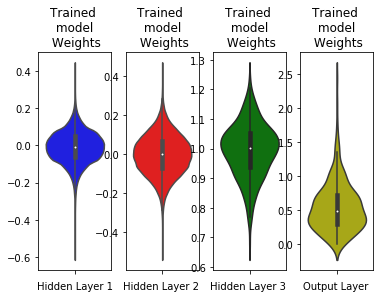

In [35]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 9. Three Hidden layers (input = 784,number of neurons in layer 1 = 400,number of neurons in layer 2 = 300,number of neurons in layer 3 = 200,output = 10) with batch normalization and dropout

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 5 and Batch_size is 128.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer2 and Layer3.
6. Dropout  rate is 0.5

In [36]:
model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)              

In [37]:
epoch5 = 5
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch5, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4143 - acc: 0.8737 - val_loss: 0.1421 - val_acc: 0.9558
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1671 - acc: 0.9495 - val_loss: 0.1156 - val_acc: 0.9628
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1182 - acc: 0.9649 - val_loss: 0.0839 - val_acc: 0.9734
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0931 - acc: 0.9718 - val_loss: 0.0840 - val_acc: 0.9735
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0712 - acc: 0.9774 - val_loss: 0.0823 - val_acc: 0.9751


Train score: 0.03955110224107824
Train accuracy: 0.9873833333333333
#############################################
Test score: 0.08230718570513418
Test accuracy: 0.9751


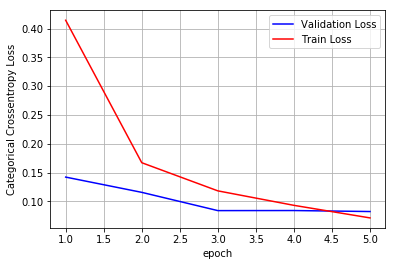

In [38]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch5+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

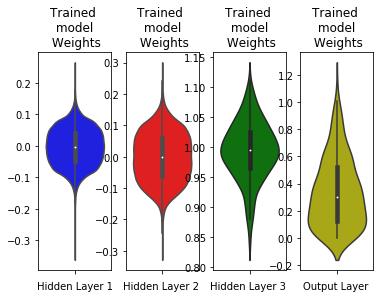

In [39]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 10. Five Hidden layers (input = 784,number of neurons in layer 1 = 450,number of neurons in layer 2 = 350,number of neurons in layer 3 = 250,number of neurons in layer 4 = 150,number of neurons in layer 5 = 50,output = 10)

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 20 and Batch_size is 128.
4. We used our metric as 'accuracy'.

In [40]:
model = Sequential()

model.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))

model.add(Dense(350, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )

model.add(Dense(250, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )

model.add(Dense(150, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )

model.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )

model.add(Dense(output_dim, activation='softmax'))


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_21 (Dense)             (None, 350)               157850    
_________________________________________________________________
dense_22 (Dense)             (None, 250)               87750     
_________________________________________________________________
dense_23 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_24 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                510       
Total params: 644,560
Trainable params: 644,560
Non-trainable params: 0
________________________________________________

In [41]:
epoch6 = 20
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch6, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2334 - acc: 0.9291 - val_loss: 0.1112 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0881 - acc: 0.9732 - val_loss: 0.0925 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0601 - acc: 0.9816 - val_loss: 0.0840 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0493 - acc: 0.9841 - val_loss: 0.0754 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0386 - acc: 0.9876 - val_loss: 0.0844 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0876 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0282 - acc: 0.9908 - val_loss: 0.0770 - val_acc

Train score: 0.005956138463119047
Train accuracy: 0.9984
#############################################
Test score: 0.0868614871434289
Test accuracy: 0.9823


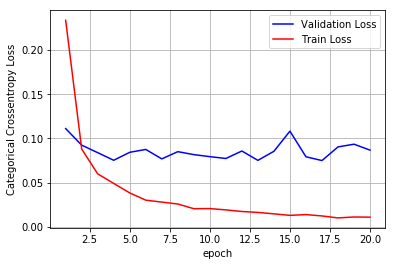

In [42]:
score1 = model.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch6+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

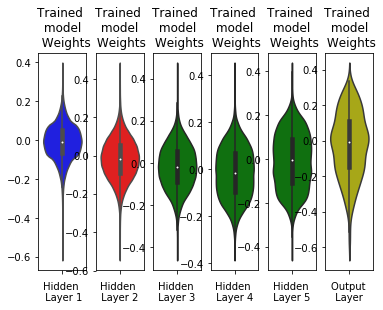

In [43]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained \n model \n  Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden \n Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden \n Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden \n Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden \n Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden \n Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output \n Layer ')
plt.show()

# 11. Five Hidden layers (input = 784,number of neurons in layer 1 = 450,number of neurons in layer 2 = 350,number of neurons in layer 3 = 250,number of neurons in layer 4 = 150,number of neurons in layer 5 = 50,output = 10) with batch normalization and dropout

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 20 and Batch_size is 128.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer2, Layer3,Layer4 and Layer5.
6. Dropout  rate is 0.5

In [44]:
model_drop = Sequential()

model_drop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(350, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_27 (Dense)             (None, 350)               157850    
_________________________________________________________________
batch_normalization_7 (Batch (None, 350)               1400      
_________________________________________________________________
dropout_7 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 250)               87750     
_________________________________________________________________
batch_normalization_8 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_8 (Dropout)          (None, 250)              

In [45]:
epoch7 = 20
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch7, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.8682 - acc: 0.7331 - val_loss: 0.2103 - val_acc: 0.9385
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2858 - acc: 0.9245 - val_loss: 0.1370 - val_acc: 0.9604
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1962 - acc: 0.9498 - val_loss: 0.1211 - val_acc: 0.9689
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1528 - acc: 0.9609 - val_loss: 0.1039 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1281 - acc: 0.9679 - val_loss: 0.1142 - val_acc: 0.9704
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1091 - acc: 0.9726 - val_loss: 0.1123 - val_acc: 0.9719
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0907 - acc: 0.9762 - val_loss: 0.0962 - val_ac

Train score: 0.009203571533679497
Train accuracy: 0.9973833333333333
#############################################
Test score: 0.10026836708746704
Test accuracy: 0.98


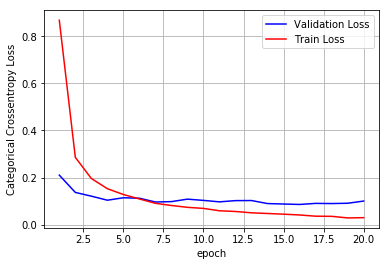

In [46]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch7+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

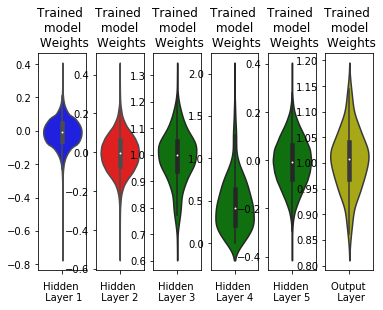

In [47]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden \n Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden \n Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden \n Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden \n Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden \n Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output \n  Layer ')
plt.show()

# 12. Five Hidden layers (input = 784,number of neurons in layer 1 = 450,number of neurons in layer 2 = 350,number of neurons in layer 3 = 250,number of neurons in layer 4 = 150,number of neurons in layer 5 = 50,output = 10) with batch normalization a dropout


In [ ]:
1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 10 and Batch_size is 128.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer2, Layer3,Layer4 and Layer5.
6. Dropout  rate is 0.5

In [48]:
model_drop = Sequential()

model_drop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(350, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 450)               353250    
_________________________________________________________________
dense_33 (Dense)             (None, 350)               157850    
_________________________________________________________________
batch_normalization_11 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_11 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 250)               87750     
_________________________________________________________________
batch_normalization_12 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)              

In [49]:
epoch8 = 10
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch8, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.9092 - acc: 0.7260 - val_loss: 0.2156 - val_acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2963 - acc: 0.9228 - val_loss: 0.1467 - val_acc: 0.9598
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2050 - acc: 0.9485 - val_loss: 0.1126 - val_acc: 0.9692
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1526 - acc: 0.9615 - val_loss: 0.1034 - val_acc: 0.9745
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1331 - acc: 0.9668 - val_loss: 0.0933 - val_acc: 0.9755
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1058 - acc: 0.9732 - val_loss: 0.1025 - val_acc: 0.9751
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0960 - acc: 0.9761 - val_loss: 0.1004 - val_ac

Train score: 0.029697504019745004
Train accuracy: 0.9924333333333333
#############################################
Test score: 0.09058548904829658
Test accuracy: 0.979


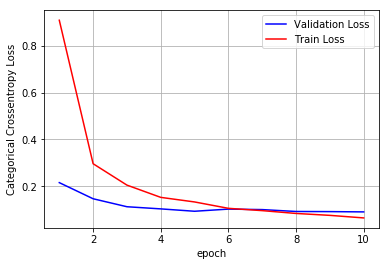

In [50]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch8+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

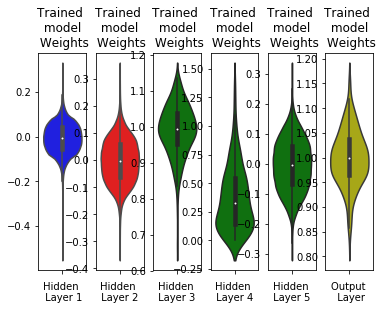

In [51]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden \n Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden \n Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden \n Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden \n Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden \n Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output \n  Layer ')
plt.show()

# 13. Hyperparameter Tuning 'epochs' and 'batch_size'

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters():

    model_drop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
    # model_drop.add(BatchNormalization())
    # model_drop.add(Dropout(0.5))

    model_drop.add(Dense(350, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
    model_drop.add(BatchNormalization())
    model_drop.add(Dropout(0.5))

    model_drop.add(Dense(250, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
    model_drop.add(BatchNormalization())
    model_drop.add(Dropout(0.5))

    model_drop.add(Dense(150, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
    model_drop.add(BatchNormalization())
    model_drop.add(Dropout(0.5))

    model_drop.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
    model_drop.add(BatchNormalization())
    model_drop.add(Dropout(0.5))

    model_drop.add(Dense(output_dim, activation='softmax'))



    model_drop.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#     history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=parameter, verbose=1, validation_data=(X_test, Y_test))
    return model_drop

In [53]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model_best = KerasClassifier(build_fn=best_hyperparameters, verbose=0)

epochs_best = [5,8]
batch_size_best = [200,300]

param_grid = dict(batch_size = batch_size_best,epochs = epochs_best)


# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model_best, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981050 using {'batch_size': 200, 'epochs': 5}
0.981050 (0.006049) with: {'batch_size': 200, 'epochs': 5}
0.688733 (0.178250) with: {'batch_size': 200, 'epochs': 8}
0.398417 (0.070855) with: {'batch_size': 300, 'epochs': 5}
0.230083 (0.036925) with: {'batch_size': 300, 'epochs': 8}


# 14. Five Hidden layers (input = 784,number of neurons in layer 1 = 450,number of neurons in layer 2 = 350,number of neurons in layer 3 = 250,number of neurons in layer 4 = 150,number of neurons in layer 5 = 50,output = 10) with batch normalization a dropout

1. Number of neurons here are activation functions.
2. Here activation function used is 'relu' and optimizer used is 'adam'.
3. Number of epochs is 5 and Batch_size is 200.
4. We used our metric as 'accuracy'.
5. We used Batch normalization and dropout at Layer2, Layer3,Layer4 and Layer5.
6. Dropout  rate is 0.5

In [55]:
model_drop = Sequential()

model_drop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_uniform(seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(350, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 450)               353250    
_________________________________________________________________
dense_117 (Dense)            (None, 350)               157850    
_________________________________________________________________
batch_normalization_67 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_67 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 250)               87750     
_________________________________________________________________
batch_normalization_68 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_68 (Dropout)         (None, 250)             

In [56]:
epoch_best = 5
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size= 200, epochs=epoch_best, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 426us/step - loss: 0.9826 - acc: 0.6973 - val_loss: 0.2251 - val_acc: 0.9353
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.3202 - acc: 0.9156 - val_loss: 0.1570 - val_acc: 0.9574
Epoch 3/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.2085 - acc: 0.9472 - val_loss: 0.1370 - val_acc: 0.9618
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1570 - acc: 0.9606 - val_loss: 0.1134 - val_acc: 0.9699
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1267 - acc: 0.9689 - val_loss: 0.1028 - val_acc: 0.9721


Train score: 0.055952023635990916
Train accuracy: 0.9843
#############################################
Test score: 0.10278879055995493
Test accuracy: 0.9721


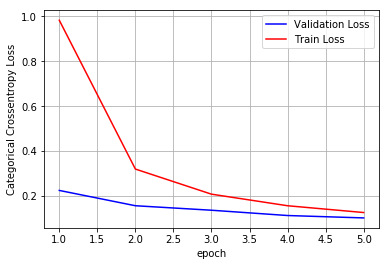

In [57]:
score1 = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch_best+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

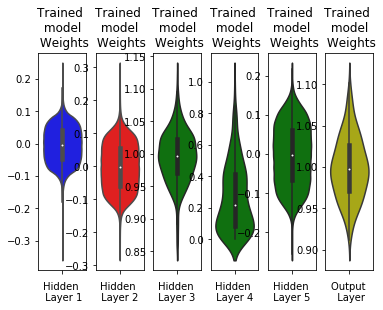

In [58]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden \n Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden \n Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden \n Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden \n Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden \n Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained \n model \n Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output \n  Layer ')
plt.show()

# 15. Conclusion

In [ ]:
adam and relu

In [9]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()

x.field_names = [ "Number of Layers", "Epoch","Batch size","BN and Dropout","Train Accuracy","Test Accuracy"]

x.add_row(["Two",40,128,"No",0.9997,0.9857])
x.add_row(["Two",20,128,"Yes at Layer1 and Layer2",0.9963,0.9827])
x.add_row(["Three",20,128,"No",0.9981,0.9818])
x.add_row(["Three",20,128,"Yes at Layer2 and Layer3",0.9979,0.9805])
x.add_row(["Three",5,128,"Yes at Layer2 and Layer3",0.9873,0.9751])
x.add_row(["Five",20,128,"No",0.9984,0.9823])
x.add_row(["Five",20,128,"Yes at Layer2,Layer3,Layer4 and Layer5",0.9973,0.98])
x.add_row(["Five",10,128,"Yes at Layer2,Layer3,Layer4 and Layer5",0.9924,0.979])
x.add_row(["Five",5,200,"Yes at Layer2,Layer3,Layer4 and Layer5",0.9843,0.9721])

print(x)





+------------------+-------+------------+----------------------------------------+----------------+---------------+
| Number of Layers | Epoch | Batch size |             BN and Dropout             | Train Accuracy | Test Accuracy |
+------------------+-------+------------+----------------------------------------+----------------+---------------+
|       Two        |   40  |    128     |                   No                   |     0.9997     |     0.9857    |
|       Two        |   20  |    128     |        Yes at Layer1 and Layer2        |     0.9963     |     0.9827    |
|      Three       |   20  |    128     |                   No                   |     0.9981     |     0.9818    |
|      Three       |   20  |    128     |        Yes at Layer2 and Layer3        |     0.9979     |     0.9805    |
|      Three       |   5   |    128     |        Yes at Layer2 and Layer3        |     0.9873     |     0.9751    |
|       Five       |   20  |    128     |                   No          